In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv("server-result-go-quinn/May-18-2021.csv", index_col=0)
#train_df = pd.read_csv("server-final_processed.csv")
train_df.head()

Implementation    Mode  \
Run                                            
0     ./server -p 4443 127.0.0.1\r\n  server   
1     ./server -p 4443 127.0.0.1\r\n  server   
2     ./server -p 4443 127.0.0.1\r\n  server   
3     ./server -p 4443 127.0.0.1\r\n  server   
4     ./server -p 4443 127.0.0.1\r\n  server   

                                TestName  Status ErrorIEV  \
Run                                                         
0    quic_server_test_ext_min_ack_delay0     NaN      NaN   
1    quic_server_test_ext_min_ack_delay0     NaN      NaN   
2    quic_server_test_ext_min_ack_delay0     NaN      NaN   
3    quic_server_test_ext_min_ack_delay0     NaN      NaN   
4    quic_server_test_ext_min_ack_delay0     NaN      NaN   

                                            OutputFile  NbPktSend  isPass  
Run                                                                        
0    /results/temp/3399/quic_server_test_ext_min_ac...        0.0     1.0  
1    /results/temp/3313/quic_server_test_ext_min_ac...        0.0     1.0  
2    /results/temp/3314/quic_server_test_ext_min_ac...        0.0     1.0  
3    /results/temp/3336/quic_server_test_ext_min_ac...        0.0     1.0  
4    /results/temp/3356/quic_server_test_ext_min_ac...        0.0     1.0

In [5]:
for i, row in train_df.iterrows():
    if isinstance(row["TestName"], str):
        train_df.loc[i, "TestName"] = row["TestName"].replace("0","")
    else:
        index = row["OutputFile"].find("q")
        train_df.loc[i, "TestName"] = row["OutputFile"][index:].replace("0","").replace(".iev","")

train_df = train_df[train_df.TestName != 'quic_server_test_tp_limit_acticoid_error']


train_df.head()

Implementation    Mode  \
Run                                            
0     ./server -p 4443 127.0.0.1\r\n  server   
1     ./server -p 4443 127.0.0.1\r\n  server   
2     ./server -p 4443 127.0.0.1\r\n  server   
3     ./server -p 4443 127.0.0.1\r\n  server   
4     ./server -p 4443 127.0.0.1\r\n  server   

                               TestName  Status ErrorIEV  \
Run                                                        
0    quic_server_test_ext_min_ack_delay     NaN      NaN   
1    quic_server_test_ext_min_ack_delay     NaN      NaN   
2    quic_server_test_ext_min_ack_delay     NaN      NaN   
3    quic_server_test_ext_min_ack_delay     NaN      NaN   
4    quic_server_test_ext_min_ack_delay     NaN      NaN   

                                            OutputFile  NbPktSend  isPass  
Run                                                                        
0    /results/temp/3399/quic_server_test_ext_min_ac...        0.0     1.0  
1    /results/temp/3313/quic_server_test_ext_min_ac...        0.0     1.0  
2    /results/temp/3314/quic_server_test_ext_min_ac...        0.0     1.0  
3    /results/temp/3336/quic_server_test_ext_min_ac...        0.0     1.0  
4    /results/temp/3356/quic_server_test_ext_min_ac...        0.0     1.0

In [6]:
server_name = train_df.Implementation.unique()
servers = []
for s in server_name:
    if "cargo run --manifest-path=tools/apps/Cargo.toml" in s:
        servers.append("quiche")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "quiche")
    if "cargo run --example server" in s:
        servers.append("quinn")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "quinn")
    if "./http_server" in s:
        servers.append("lsquic")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "lsquic")
    if "./picoquicdemo" in s:
        servers.append("picoquic")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "picoquic")
    if "./server -d" in s:
        servers.append("quant")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "quant")
    if "./server -p" in s:
        servers.append("quic-go")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "quic-go")
    if "python3" in s:
        servers.append("aioquic")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "aioquic")
    if "echo" in s:
        servers.append("mvfst")
        train_df["Implementation"] = train_df["Implementation"].replace(s, "mvfst")

print(servers)
train_df["isPass"] = train_df["isPass"].replace(0.0, 0)
train_df["isPass"] = train_df["isPass"].replace(1.0, 1)

train_df.head()

['quic-go', 'quinn']


Implementation    Mode                            TestName  Status  \
Run                                                                      
0          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   
1          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   
2          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   
3          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   
4          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   

    ErrorIEV                                         OutputFile  NbPktSend  \
Run                                                                          
0        NaN  /results/temp/3399/quic_server_test_ext_min_ac...        0.0   
1        NaN  /results/temp/3313/quic_server_test_ext_min_ac...        0.0   
2        NaN  /results/temp/3314/quic_server_test_ext_min_ac...        0.0   
3        NaN  /results/temp/3336/quic_server_test_ext_min_ac...        0.0   
4        NaN  /results/temp/3356/quic_server_test_ext_min_ac...        0.0   

     isPass  
Run          
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0

In [7]:
for i, row in train_df.iterrows():
    if row["isPass"] == 0.0  :
        if  row["Implementation"] != "quiche" :
            resultFile =  "server-result-go-quinn/" + row["OutputFile"][9:]
            f = open(resultFile, "r")
            content = f.read()
            if "frame.connection_close:" in content and not "quic_server_test_connection_close" in resultFile:
                start_index = content.find("frame.connection_close:")
                end_index = content.find(",",start_index)
                train_df.loc[i, "ErrorIEV"] = content[start_index:end_index+1].replace(",","") + "}"
            elif "Run out of cid" in content:
                train_df.loc[i, "ErrorIEV"] = "Run out of cid"
            elif "ivy_return_code(1)+value(" in content:
                train_df.loc[i, "ErrorIEV"] = "Run out of cid"
            elif "ivy_return_code(139)" in content :
                train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 139"
            elif "ivy_return_code(134)" in content :
                train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 134"
            elif content.count("tls_recv_event") > 10:
                train_df.loc[i, "ErrorIEV"] = "Handshake not completed"
            elif 'ivy_return_code(1)' in content:
                start_index = content.find('assumption_failed(""')
                end_index = content.find('"")',start_index)
                c = content[start_index:end_index+1]
                c = c.replace('assumption_failed(""',"")
                train_df.loc[i, "ErrorIEV"] = c
            elif "timeout" in content and "undecryptable_packet_event" in content:
                train_df.loc[i, "ErrorIEV"] = "Handshake not completed" 
            elif "timeout+" in row["ErrorIEV"] :
                train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 134"
            elif "ivy_return_code(1)+value(" in row["ErrorIEV"]:
                train_df.loc[i, "ErrorIEV"] = "Run out of cid"
            elif 'ivy_return_code(1)+"")' in row["ErrorIEV"]:
                start_index = content.find('assumption_failed(""')
                end_index = content.find('"")',start_index)
                c = content[start_index:end_index+1]
                c = c.replace('assumption_failed(""',"")
                train_df.loc[i, "ErrorIEV"] = c
            elif 'ivy_return_code(1)' in row["ErrorIEV"]:
                start_index = content.find('assumption_failed(""')
                end_index = content.find('"")',start_index)
                c = content[start_index:end_index+1]
                c = c.replace('assumption_failed(""',"")
                train_df.loc[i, "ErrorIEV"] = c
    else:
        train_df.loc[i, "ErrorIEV"] = "No Error"

for i, row in train_df.iterrows():
    if row["isPass"] == 0.0:
        train_df.loc[i, "ErrorIEV"]  = train_df.loc[i, "ErrorIEV"].replace("\n","").replace("    ","")
print(train_df.head())

    Implementation    Mode                            TestName  Status  \
Run                                                                      
0          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   
1          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   
2          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   
3          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   
4          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   

     ErrorIEV                                         OutputFile  NbPktSend  \
Run                                                                           
0    No Error  /results/temp/3399/quic_server_test_ext_min_ac...        0.0   
1    No Error  /results/temp/3313/quic_server_test_ext_min_ac...        0.0   
2    No Error  /results/temp/3314/quic_server_test_ext_min_ac...        0.0   
3    No Error  /results/temp/3336/quic_server_test_ext_min_ac...        0.0   
4    No

In [8]:
for i, row in train_df.iterrows():
    if row["isPass"] == 0.0  :
        if row["Implementation"] == "quiche":
            resultFile =  row["OutputFile"][77:]
            f = open(resultFile, "r")
            content = f.read()
            if "frame.connection_close:" in content and not "quic_server_test_connection_close" in resultFile:
                start_index = content.find("frame.connection_close:")
                end_index = content.find(",",start_index)
                train_df.loc[i, "ErrorIEV"] = content[start_index:end_index+1].replace(",","") + "}"
            elif "Run out of cid" in content:
                train_df.loc[i, "ErrorIEV"] = "Run out of cid"
            elif "ivy_return_code(1)+value(" in content:
                train_df.loc[i, "ErrorIEV"] = "Run out of cid"
            elif "ivy_return_code(139)" in content :
                train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 139"
            elif "ivy_return_code(134)" in content :
                train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 134"

            elif "require conn_total_data(the_cid) > 0;" in content and "stream.handle" in content: #In fact we only do unidirectionnal with quiche
                train_df.loc[i, "ErrorIEV"] = "No error"   
                train_df.loc[i, "isPass"] = 1.0

            #elif content.count("tls_recv_event") > 10:
            #    train_df.loc[i, "ErrorIEV"] = "Handshake not completed"
            elif 'ivy_return_code(1)' in content:
                start_index = content.find('assumption_failed(""')
                end_index = content.find('"")',start_index)
                c = content[start_index:end_index+1]
                c = c.replace('assumption_failed(""',"")
                train_df.loc[i, "ErrorIEV"] = c
            elif "timeout" in content and "undecryptable_packet_event" in content:
                train_df.loc[i, "ErrorIEV"] = "Handshake not completed" 
            elif "timeout+" in row["ErrorIEV"] :
                train_df.loc[i, "ErrorIEV"] = "Segmentation Fault 134"
            elif "ivy_return_code(1)+value(" in row["ErrorIEV"]:
                train_df.loc[i, "ErrorIEV"] = "Run out of cid"
            elif 'ivy_return_code(1)+"")' in row["ErrorIEV"]:
                start_index = content.find('assumption_failed(""')
                end_index = content.find('"")',start_index)
                c = content[start_index:end_index+1]
                c = c.replace('assumption_failed(""',"")
                train_df.loc[i, "ErrorIEV"] = c
            elif 'ivy_return_code(1)' in row["ErrorIEV"]:
                start_index = content.find('assumption_failed(""')
                end_index = content.find('"")',start_index)
                c = content[start_index:end_index+1]
                c = c.replace('assumption_failed(""',"")
                train_df.loc[i, "ErrorIEV"] = c
    else:
        train_df.loc[i, "ErrorIEV"] = "No Error"

In [9]:
# Preprocess multiple output possible
subdf = train_df.loc[train_df['TestName'] == 'quic_server_test_token_error']
for i, row in train_df.iterrows():
    if row['TestName'] == 'quic_server_test_token_error':
        if row["ErrorIEV"] == "Handshake not completed":
            train_df.loc[i, "isPass"] = 1.0
            #train_df.loc[i, "ErrorIEV"] = "No Error"
for i, row in train_df.iterrows():
    if row['TestName'] == 'quic_server_test_double_tp_error':
        if row["ErrorIEV"] == "Handshake not completed":
            train_df.loc[i, "isPass"] = 1.0
            #train_df.loc[i, "ErrorIEV"] = "No Error"
for i, row in train_df.iterrows():
    if row['TestName'] == 'quic_server_test_unkown':
        if "frame.connection_close:{err_code:0x7}" in row["ErrorIEV"]:
            train_df.loc[i, "isPass"] = 1.0
            train_df.loc[i, "ErrorIEV"] = "No Error"
            
for i, row in train_df.iterrows():
    if row['TestName'] == 'quic_server_test_no_icid':
        if "frame.connection_close:{err_code:0x8}" in row["ErrorIEV"]:
            train_df.loc[i, "isPass"] = 1.0
            train_df.loc[i, "ErrorIEV"] = "No Error"
print(train_df.head())

    Implementation    Mode                            TestName  Status  \
Run                                                                      
0          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   
1          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   
2          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   
3          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   
4          quic-go  server  quic_server_test_ext_min_ack_delay     NaN   

     ErrorIEV                                         OutputFile  NbPktSend  \
Run                                                                           
0    No Error  /results/temp/3399/quic_server_test_ext_min_ac...        0.0   
1    No Error  /results/temp/3313/quic_server_test_ext_min_ac...        0.0   
2    No Error  /results/temp/3314/quic_server_test_ext_min_ac...        0.0   
3    No Error  /results/temp/3336/quic_server_test_ext_min_ac...        0.0   
4    No

In [10]:
print(train_df["ErrorIEV"].unique().tolist())

['No Error', 'Handshake not completed', 'frame.connection_close:{err_code:0xa}', 'server_return_code(1)+timeout', 'frame.connection_close:{err_code:0x7}', 'require is_frame_encoding_error | is_stream_limit_error;"', 'require stream_id_allowed(dcid,f.id);  # [6]"', 'server_return_code(1)+test_completed', 'require dcid = 0;"', 'require is_protocol_violation"', 'require conn_total_data(the_cid) > 0;"', 'require is_transport_parameter_error;"', 'Segmentation Fault 134', 'require is_frame_encoding_error;"']


In [10]:
train_df.TestName.unique()

array(['quic_server_test_tp_error', 'quic_server_test_stream',
       'quic_server_test_double_tp_error',
       'quic_server_test_tp_acticoid_error', 'quic_server_test_unkown',
       'quic_server_test_accept_maxdata',
       'quic_server_test_connection_close',
       'quic_server_test_blocked_streams_maxstream_error',
       'quic_server_test_no_icid', 'quic_server_test_reset_stream',
       'quic_server_test_tp_limit_newcoid',
       'quic_server_test_ext_min_ack_delay',
       'quic_server_test_retirecoid_error', 'quic_server_test_max',
       'quic_server_test_handshake_done_error',
       'quic_server_test_token_error'], dtype=object)

In [8]:
from scapy.all import *
import threading
import multiprocessing

# splitting dataframe by row index 
total_rows = train_df.shape[0]
print(total_rows)
cnt  = 10 #multiprocessing.cpu_count()
size = total_rows / cnt
size = int(size)
print(size)
list_of_dfs = [train_df.loc[i:i+size-1,:] for i in range(0, len(train_df),size)]
print(len(list_of_dfs))
print()
j = 0


def process_pkt(df):
    for index, row in df.iterrows():
        outfile = row["OutputFile"]
        if "iev" in row["OutputFile"] :
            i =  row["OutputFile"][outfile.find("/",13)+1:outfile.find("/",14)] 
            if isinstance(row["TestName"],str) and not row["TestName"] == np.nan :
                resultFile = "server-result-final/temp/" + str(i) + "_quic_server_" + str(row["TestName"])  + ".pcap"
                packets = rdpcap(resultFile)
                ln = len(packets)
                df.loc[index, "NbPktSend"] = ln
    
        
for index in range(cnt):
    process_pkt(list_of_dfs[index])
    toPrint = (j/size) * 10
    print(str(toPrint) + "% Processed")
    train_df.to_csv(path_or_buf="server-final_processed.csv",index=False)
    j += size
    

train_df.head()

13728
1372
11



FileNotFoundError: [Errno 2] No such file or directory: 'server-result-3/temp/Toward-verification-of-QUIC-extensions_quic_server_quic_server_test_tp_error.pcap'

In [ ]:
# Failure per test

tests = train_df.TestName.unique()

#plt.figure(figsize=[10,10])
#f,a = plt.subplots(2,2)
#a = a.ravel()

for t in tests:
    subdf = train_df.loc[train_df['TestName'] == t]
    #subdf = subdf.loc[subdf['Implementation'] != "quinn"]
    max_value = subdf["NbPktSend"].max() 
    
    plt.hist(subdf['NbPktSend'], color = 'blue', edgecolor = 'black',
             range = [0,max_value],bins=max(int(max_value),1))

    # seaborn histogram
    sns.displot(subdf['NbPktSend'],
                 kde=True)
    # Add labels
    plt.xticks(np.arange(0, int(max_value),5))
    # positions = (0, 1)
    # labels = ("Fail", "Pass")
    # plt.xticks(positions, labels)
    plt.title("Packets send for test " + t)
    plt.xlabel('Number of packet')
    plt.ylabel('%')
    filename = 'plot/' + "packets_" + t + '.png'
    plt.savefig(filename)
    plt.show()

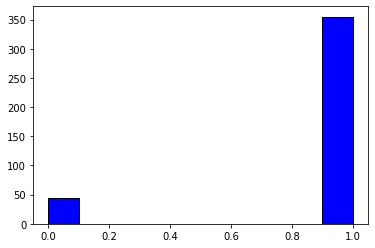

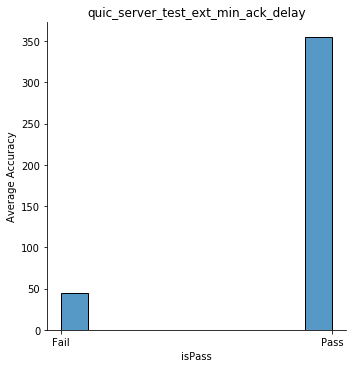

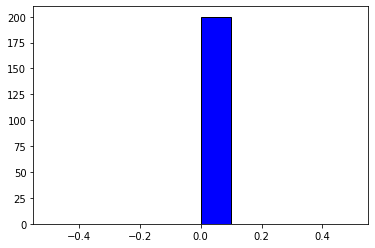

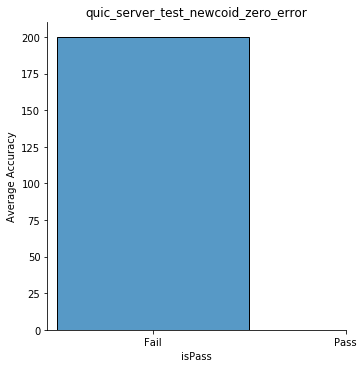

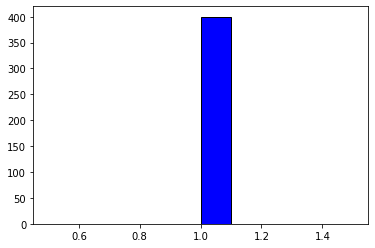

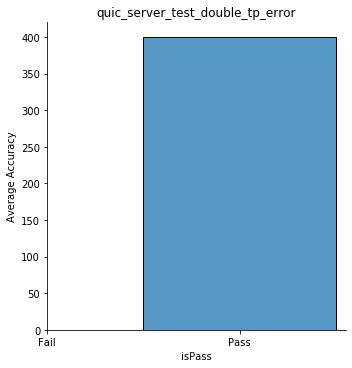

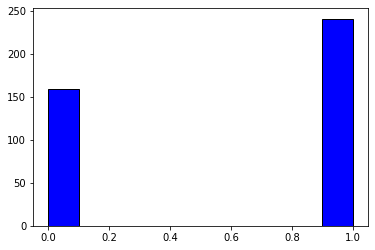

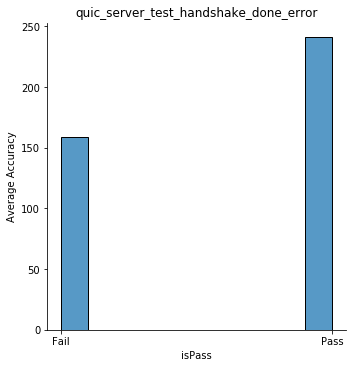

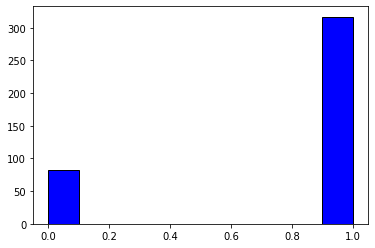

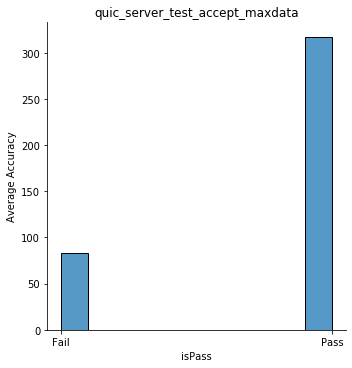

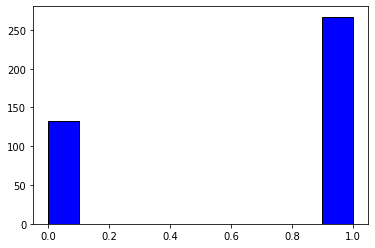

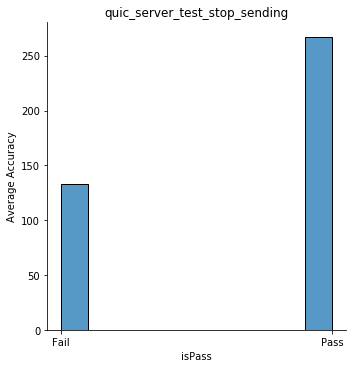

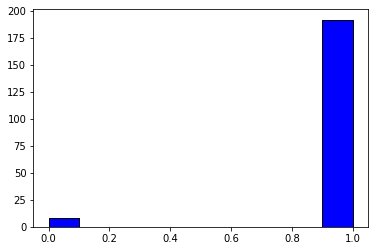

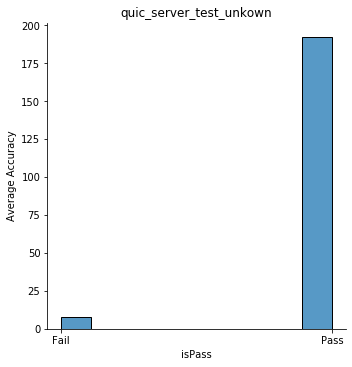

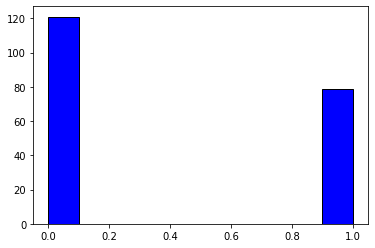

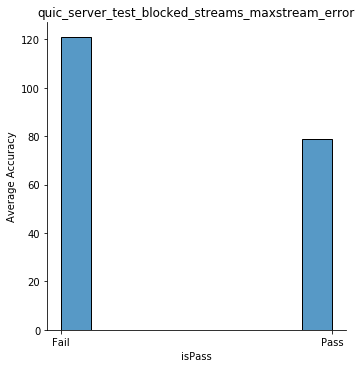

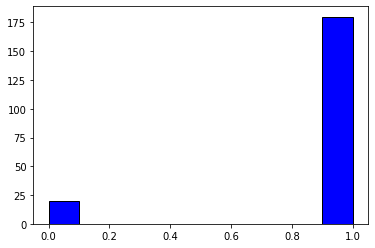

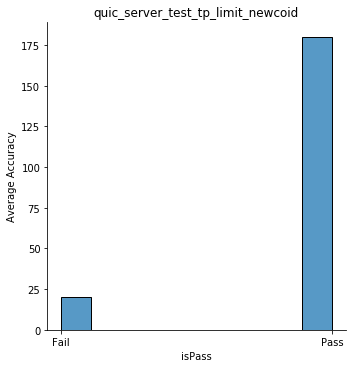

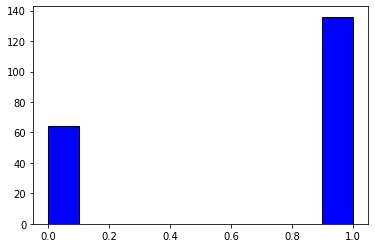

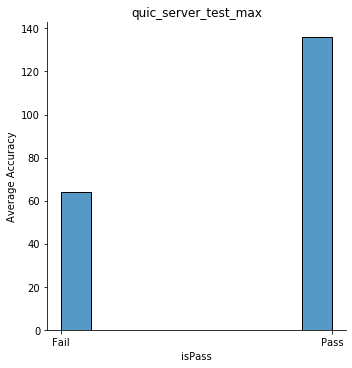

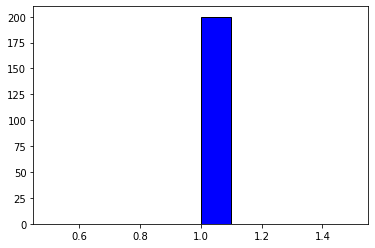

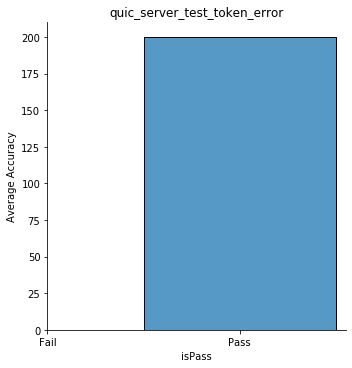

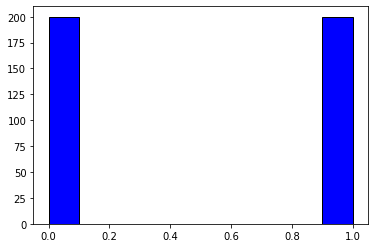

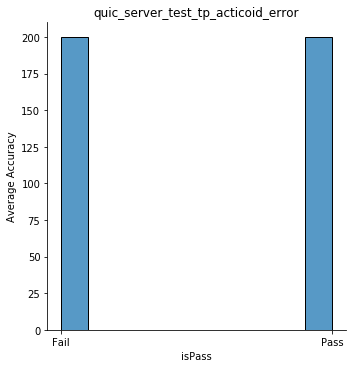

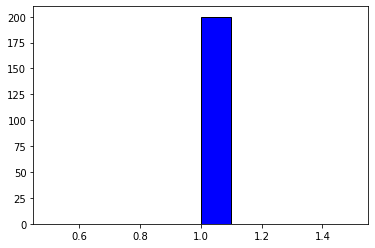

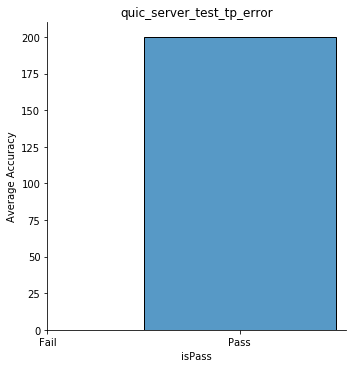

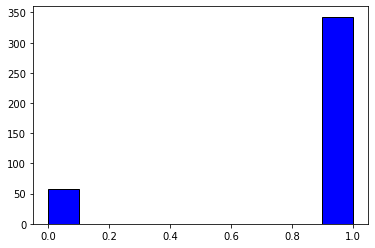

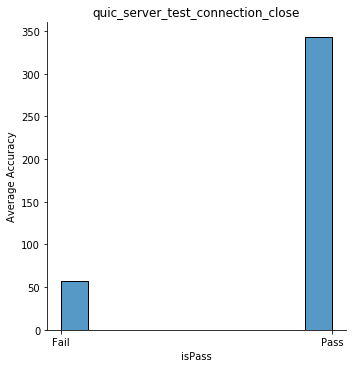

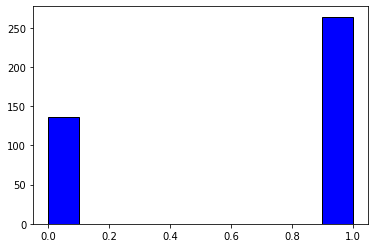

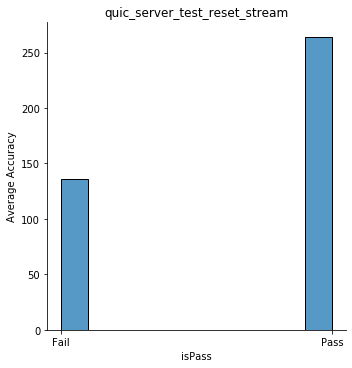

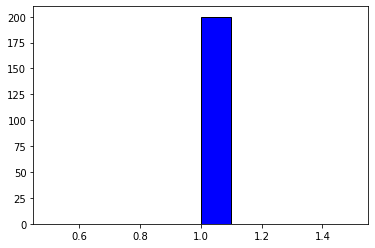

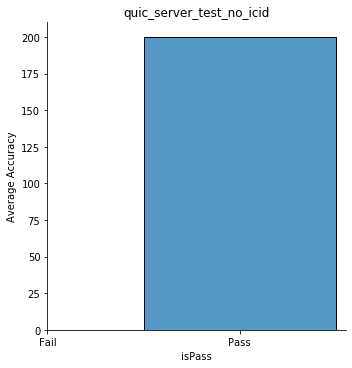

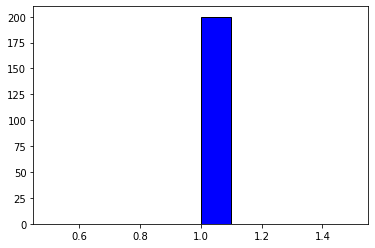

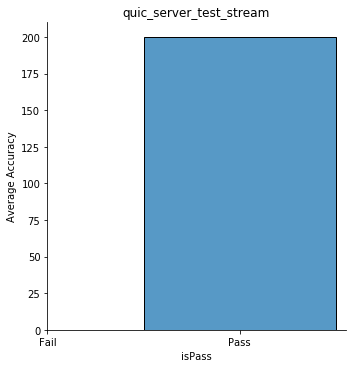

In [17]:
tests = train_df.TestName.unique()

for t in tests:
    subdf = train_df.loc[train_df['TestName'] == t]
    plt.hist(subdf['isPass'], color = 'blue', edgecolor = 'black')

    # seaborn histogram
    sns.displot(subdf['isPass'], kde=False)
    # Add labels
    plt.title(t)
    plt.xticks(np.arange(0, 2, 1))
    positions = (0, 1)
    labels = ("Fail", "Pass")
    plt.xticks(positions, labels)
    plt.xlabel('isPass')
    plt.ylabel('Average Accuracy')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'plot/quic_server_test_ext_min_ack_delay_for_quic-go.png'

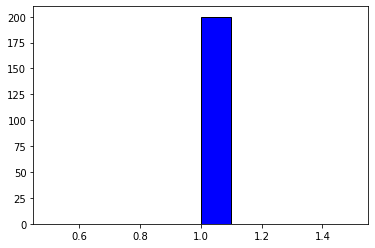

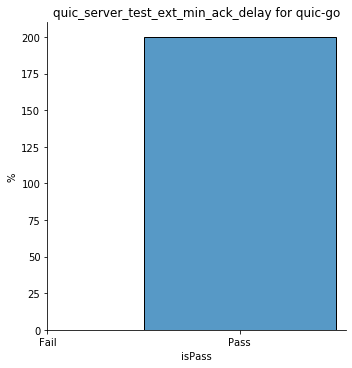

In [11]:
tests = train_df.TestName.unique()

servers = train_df.Implementation.unique() #['lsquic', 'quinn',  'mvfst', 'picoquic', 'quant', 'quic-go', 'aioquic']
#plt.figure(figsize=[10,10]) 'lsquic',
#f,a = plt.subplots(2,2)
#a = a.ravel()

for t in tests:
    subdf = train_df.loc[train_df['TestName'] == t]
    for s in servers:
        subsubdf = subdf.loc[subdf['Implementation'] == s]
        plt.hist(subsubdf['isPass'], color = 'blue', edgecolor = 'black')

        # seaborn histogram
        sns.displot(subsubdf['isPass'], kde=False)
        # Add labels
        plt.xticks(np.arange(0, 1, 1))
        positions = (0, 1)
        labels = ("Fail", "Pass")
        plt.xticks(positions, labels)
        plt.title(t + " for " + s)
        plt.xlabel('isPass')
        plt.ylabel('%')
        filename = 'plot/' + t + "_for_" + s + '.png'
        plt.savefig(filename)

        plt.show()
    

In [12]:
for t in servers:
    subdf = train_df.loc[train_df['Implementation'] == t]
    
    print(t)
    print(len(subdf.index))
    print(subdf["isPass"].sum())
    print()

quic-go
2500
1630.0

quinn
2500
2144.0



In [13]:
for t in tests: #servers:
    subdf = train_df.loc[train_df['TestName'] == t]
    for s in servers: # tests:
        ssubdf = subdf.loc[subdf['Implementation'] == s]
        print(t)
        print(s)
        print(len(ssubdf.index))
        print(ssubdf["isPass"].sum())
        print()

quic_server_test_ext_min_ack_delay
quic-go
200
200.0

quic_server_test_ext_min_ack_delay
quinn
200
155.0

quic_server_test_newcoid_zero_error
quic-go
100
0.0

quic_server_test_newcoid_zero_error
quinn
100
0.0

quic_server_test_double_tp_error
quic-go
200
200.0

quic_server_test_double_tp_error
quinn
200
200.0

quic_server_test_handshake_done_error
quic-go
200
42.0

quic_server_test_handshake_done_error
quinn
200
199.0

quic_server_test_accept_maxdata
quic-go
200
134.0

quic_server_test_accept_maxdata
quinn
200
183.0

quic_server_test_stop_sending
quic-go
200
67.0

quic_server_test_stop_sending
quinn
200
200.0

quic_server_test_unkown
quic-go
100
96.0

quic_server_test_unkown
quinn
100
96.0

quic_server_test_blocked_streams_maxstream_error
quic-go
100
9.0

quic_server_test_blocked_streams_maxstream_error
quinn
100
70.0

quic_server_test_tp_limit_newcoid
quic-go
100
100.0

quic_server_test_tp_limit_newcoid
quinn
100
80.0

quic_server_test_max
quic-go
100
39.0

quic_server_test_max
quinn


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
quic_server_test_ext_min_ack_delay
quic-go
['No Error']
GOOD
(0.0, 0.3, 1.0, 1.0)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


FileNotFoundError: [Errno 2] No such file or directory: 'plot-all/errors_for_quic-go_in_test_quic_server_test_ext_min_ack_delay.png'

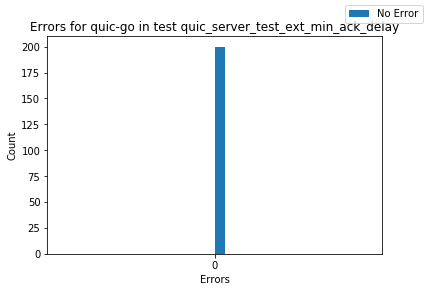

In [14]:
all_errors = train_df["ErrorIEV"].unique().tolist()
tests = train_df.TestName.unique()
res = []
for i, row in train_df.iterrows():
    ind = all_errors.index(row["ErrorIEV"])
    res.append(ind)
train_df["ErrorsCode"] = res


for s in servers:
    subdf = train_df.loc[train_df['Implementation'] == s]
    for t in tests:
        subsubdf = subdf.loc[subdf['TestName'] == t]
        errors = subsubdf["ErrorIEV"].unique()
        
        all_errors = subsubdf["ErrorIEV"].unique().tolist()
        all_errors_ind = {all_errors[x]:x for x in range(len(all_errors))}

        res = []
        for i, row in subsubdf.iterrows():
            ind = all_errors_ind[row["ErrorIEV"]]
            res.append(ind)
        print(res)
        subsubdf["ErrorsCode"] = res
        
        print(t)
        print(s)
        print(all_errors)
        
        all_errors = subsubdf["ErrorsCode"].unique().tolist()        
        # seaborn histogramabs
        # for error in all_errors:
        #     cnt = subsubdf.loc[subsubdf['ErrorsCode'] == error]['ErrorsCode']
            #print(cnt)
        #     sns.displot(x=list(cnt), kde=False)
        
        #sns.displot(x=subsubdf['ErrorsCode'],kde=False ) #,hue="Implementation"
        N, bins, patches = plt.hist(subsubdf['ErrorsCode'], 30)
        #for i in range(0,len(subsubdf['ErrorsCode'].uniques().tolist())):
        print("GOOD")
        # Add labels
        #f, axs = plt.subplots(1,2,
        #              figsize=(9,5),
        #              sharey=True)
        
        cmap = plt.get_cmap('jet')
        all_errors = subsubdf["ErrorIEV"].unique().tolist()
        for i in range(0,len(all_errors)):
            c = cmap(0.2*(i+1.0))
            print(c)
            patches[i].set_label(all_errors[i])
            #patches[i].set_facecolor(c)
        
        plt.title("Errors for " + s + " in test " + t)
        plt.xticks(np.arange(0,len(all_errors)))  #'vertical'
        positions = tuple(np.arange(0, len(all_errors)))
        labels =  tuple(all_errors_ind.values())
        plt.xticks(positions, labels)
        plt.xlabel('Errors')
        plt.ylabel('Count')

        #plt.legend(handles=subsubdf['ErrorsCode'], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-small')
        filename = 'plot-all/' + "errors_for_" + s + "_in_test_" + t + '.png'
        fig = plt.gcf()
        fig.legend() #loc="center left",  bbox_to_anchor=(0.5, 1.15)
        #plt.tight_layout()
        #fig.set_size_inches(5,5)
        plt.savefig(filename, dpi=fig.dpi*2)
        plt.show()

In [14]:
for i, row in train_df.iterrows():
    if row['TestName'] == 'quic_server_test_no_icid':
        if 'require initial_source_connection_id.is_set(trans_params(scid));  # [5]"' in row["ErrorIEV"]:
            train_df.drop(i,0,inplace=True)

In [17]:
subdf = train_df.loc[train_df['TestName'] == 'quic_server_test_unkown']
subsubdf = subdf.loc[subdf['Implementation'] == 'mvfst']
print(subsubdf.loc[subsubdf["ErrorIEV"] == 'Segmentation Fault 139']["OutputFile"][293][-50:]) #[468][-50:]
#print(subsubdf.loc[subsubdf['TestName'] == 'quic_server_test_stream']["OutputFile"][67][-50:])

esult-final/temp/1091/quic_server_test_unkown0.iev


In [19]:
tests = train_df.TestName.unique()

subdf = train_df.loc[train_df['Implementation'] == 'quinn']
for t in tests:
    print(t)
    errors = {}
    subsubdf = subdf.loc[subdf['TestName'] == t]
    for i, row in subsubdf.iterrows():
        err = row['ErrorIEV']
        if err in errors:
            errors[err] = errors[err] + 1
        else :
            errors[err] = 1
    print(errors)

quic_server_test_ext_min_ack_delay
{'No Error': 155, 'Handshake not completed': 45}
quic_server_test_newcoid_zero_error
{'Handshake not completed': 85, 'require dcid = 0;"': 14, 'require is_protocol_violation"': 1}
quic_server_test_double_tp_error
{'No Error': 200}
quic_server_test_handshake_done_error
{'No Error': 199, 'Segmentation Fault 134': 1}
quic_server_test_accept_maxdata
{'No Error': 183, 'require conn_total_data(the_cid) > 0;"': 2, 'Handshake not completed': 7, 'require stream_id_allowed(dcid,f.id);  # [6]"': 8}
quic_server_test_stop_sending
{'No Error': 200}
quic_server_test_unkown
{'No Error': 96, 'Handshake not completed': 4}
quic_server_test_blocked_streams_maxstream_error
{'Handshake not completed': 30, 'No Error': 70}
quic_server_test_tp_limit_newcoid
{'No Error': 80, 'Handshake not completed': 20}
quic_server_test_max
{'No Error': 97, 'require stream_id_allowed(dcid,f.id);  # [6]"': 2, 'Handshake not completed': 1}
quic_server_test_token_error
{'No Error': 100}
quic_se

In [20]:
tests = train_df.TestName.unique()

subdf = train_df.loc[train_df['Implementation'] == 'quic-go']
for t in tests:
    print(t)
    errors = {}
    subsubdf = subdf.loc[subdf['TestName'] == t]
    for i, row in subsubdf.iterrows():
        err = row['ErrorIEV']
        if err in errors:
            errors[err] = errors[err] + 1
        else :
            errors[err] = 1
    print(errors)

quic_server_test_ext_min_ack_delay
{'No Error': 200}
quic_server_test_newcoid_zero_error
{'Handshake not completed': 71, 'server_return_code(1)+timeout': 17, 'require dcid = 0;"': 9, 'require is_protocol_violation"': 3}
quic_server_test_double_tp_error
{'No Error': 200}
quic_server_test_handshake_done_error
{'frame.connection_close:{err_code:0xa}': 158, 'No Error': 42}
quic_server_test_accept_maxdata
{'Handshake not completed': 23, 'No Error': 134, 'server_return_code(1)+test_completed': 31, 'require conn_total_data(the_cid) > 0;"': 12}
quic_server_test_stop_sending
{'No Error': 67, 'Handshake not completed': 73, 'server_return_code(1)+test_completed': 60}
quic_server_test_unkown
{'No Error': 96, 'Handshake not completed': 1, 'require is_frame_encoding_error;"': 3}
quic_server_test_blocked_streams_maxstream_error
{'frame.connection_close:{err_code:0x7}': 66, 'Handshake not completed': 22, 'require is_frame_encoding_error | is_stream_limit_error;"': 3, 'No Error': 9}
quic_server_test_tp